# CiFAR-10 Images Classification Using CNNs




### Problem Statement

- CIFAR-10 is a dataset that consists of several images divided into the following 10 classes: 
    - Airplanes
    - Cars 
    - Birds
    - Cats
    - Deer
    - Dogs
    - Frogs
    - Horses
    - Ships
    - Trucks

- The dataset stands for the Canadian Institute For Advanced Research (CIFAR)
- CIFAR-10 is widely used for machine learning and computer vision applications. 
- The dataset consists of 60,000 32x32 color images and 6,000 images of each class.
- Images have low resolution (32x32). 
- Data Source: https://www.cs.toronto.edu/~kriz/cifar.html


In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn 

In [2]:
# Import Dataset
from keras.datasets import cifar10
(X_train, y_train) , (X_test, y_test) = cifar10.load_data()

C:\Users\Manish Garg\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
X_train.shape

(50000, 32, 32, 3)

In [4]:
X_test.shape

(10000, 32, 32, 3)

In [5]:
y_train.shape

(50000, 1)

In [6]:
y_test.shape

(10000, 1)

[0]


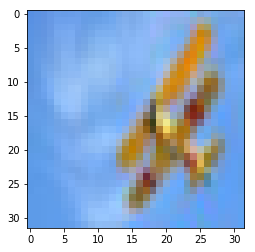

In [7]:
# Visualization
# pick a random number
n_training = len(X_train)
i= np.random.randint(0, n_training)

plt.imshow(X_train[i],cmap='gray')
print(y_train[i])

[0]


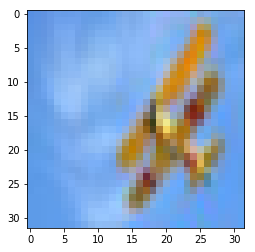

In [8]:
plt.imshow(X_train[i])
print(y_train[i])

**View more Images in a grid** :

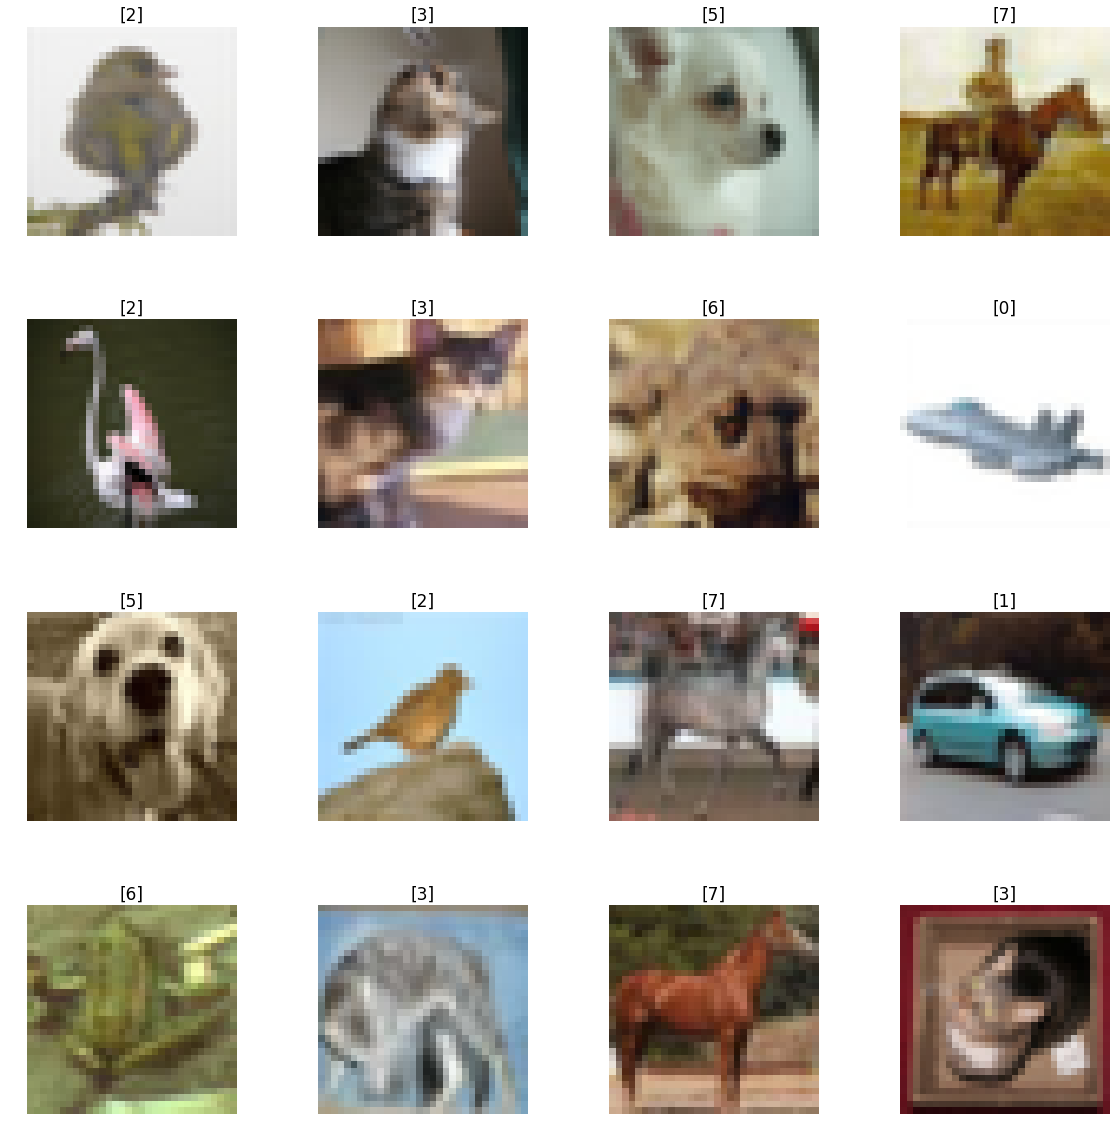

In [9]:
# the dimension of the grid 
ncols = 4
nrows = 4

fig, axes = plt.subplots(nrows, ncols,figsize = (20,20))    
axes = axes.ravel()

n_training = len(X_train)

for i in np.arange(0, nrows * ncols):
    index = np.random.randint(0, n_training) # pick a random number
    axes[i].imshow(X_train[index])
    axes[i].set_title(y_train[index],fontsize = 17)
    axes[i].axis('off')
    
plt.subplots_adjust(hspace = 0.4)

In [10]:
n_training

50000

In [11]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [12]:
number_class = 10

In [13]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [14]:
import keras
y_train = keras.utils.to_categorical(y_train, number_class)

In [15]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [16]:
y_test = keras.utils.to_categorical(y_test, number_class)

In [17]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [18]:
X_train = X_train/255
X_test = X_test/255


In [19]:
X_train

array([[[[0.23137255, 0.24313726, 0.24705882],
         [0.16862746, 0.18039216, 0.1764706 ],
         [0.19607843, 0.1882353 , 0.16862746],
         ...,
         [0.61960787, 0.5176471 , 0.42352942],
         [0.59607846, 0.49019608, 0.4       ],
         [0.5803922 , 0.4862745 , 0.40392157]],

        [[0.0627451 , 0.07843138, 0.07843138],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509805, 0.21568628],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117648, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215687, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941177, 0.19607843],
         [0.47058824, 0.32941177, 0.19607843],
         [0.42745098, 0.28627452, 0.16470589]],

        ...,

        [[0.8156863 , 0.6666667 , 0.3764706 ],
         [0.7882353 , 0.6       , 0.13333334]

In [20]:
X_train.shape

(50000, 32, 32, 3)

In [21]:
Input_shape = X_train.shape[1:]

In [22]:
Input_shape

(32, 32, 3)

In [23]:
# Training
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam


In [24]:
cnn_model = Sequential()
cnn_model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu', input_shape = Input_shape))
cnn_model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.2))


cnn_model.add(Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu'))
cnn_model.add(Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.2))

cnn_model.add(Flatten())

cnn_model.add(Dense(units = 1024, activation = 'relu'))

cnn_model.add(Dense(units = 1024, activation = 'relu'))

cnn_model.add(Dense(units = 10, activation = 'softmax'))

In [25]:
cnn_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 64)        1792      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 128)       73856     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 10, 10, 128)       147584    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 128)         0         
__________

In [26]:
cnn_model.compile(loss = 'categorical_crossentropy', optimizer = keras.optimizers.rmsprop(lr = 0.001), metrics = ['accuracy'])

In [27]:
history = cnn_model.fit(X_train, y_train, batch_size = 32, epochs = 5, shuffle = True)

Epoch 1/5
50000/50000 [==============================] - 547s 11ms/step - loss: 1.5517 - acc: 0.4466
Epoch 2/5
50000/50000 [==============================] - 546s 11ms/step - loss: 1.1241 - acc: 0.6193
Epoch 3/5
50000/50000 [==============================] - 546s 11ms/step - loss: 1.0214 - acc: 0.6601
Epoch 4/5
50000/50000 [==============================] - 546s 11ms/step - loss: 0.9672 - acc: 0.6784
Epoch 5/5
50000/50000 [==============================] - 543s 11ms/step - loss: 0.9504 - acc: 0.6870


In [28]:
# Evaluation
evaluation = cnn_model.evaluate(X_test, y_test)
print('Test Accuracy: {}'.format(evaluation[1]))

10000/10000 [==============================] - 32s 3ms/step
Test Accuracy: 0.6971


In [29]:
predicted_classes = cnn_model.predict_classes(X_test) 
predicted_classes

array([3, 1, 8, ..., 5, 4, 7], dtype=int64)

In [30]:
cnn_model.predict(X_test).shape

(10000, 10)

In [31]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [32]:
y_test = y_test.argmax(1)

In [33]:
y_test

array([3, 8, 8, ..., 5, 1, 7], dtype=int64)

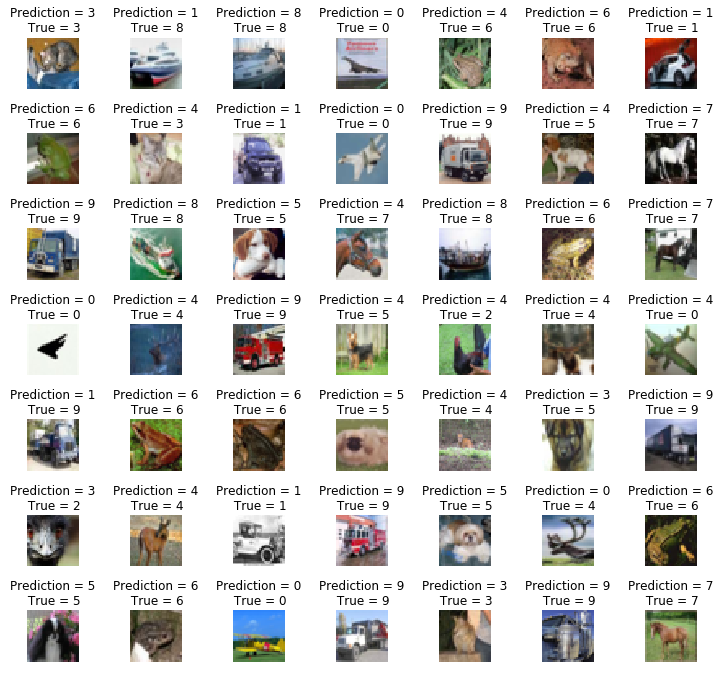

In [34]:
L = 7
W = 7
fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(predicted_classes[i], y_test[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1)    

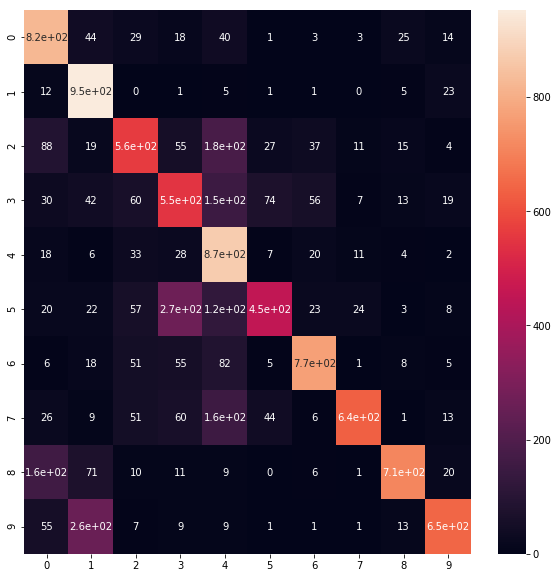

In [35]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, predicted_classes)
cm
plt.figure(figsize = (10, 10))
sns.heatmap(cm, annot = True)

### Save The Model:

In [36]:
import os 
directory = os.path.join(os.getcwd(), 'saved_models')

In [37]:
if not os.path.isdir(directory):
    os.makedirs(directory)
model_path = os.path.join(directory, 'keras_cifar10_trained_model.h5')
cnn_model.save(model_path)

### Data Augmentation:

- Image Augmentation is the process of artificially increasing the variations of the images in the datasets by flipping, enlarging, rotating the original images. 
- Augmentations also include shifting and changing the brightness of the images.

In [42]:
# Again load the dataset
import keras
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [43]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [44]:
X_train.shape

(50000, 32, 32, 3)

In [45]:
y_train = keras.utils.to_categorical(y_train, number_class)

In [46]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [47]:
y_test = keras.utils.to_categorical(y_test, number_class)
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [50]:
n = 8 
X_train_sample = X_train[:n]

In [51]:
X_train_sample.shape

(8, 32, 32, 3)

In [52]:
from keras.preprocessing.image import ImageDataGenerator

dataget_train = ImageDataGenerator(rotation_range = 90)
# dataget_train = ImageDataGenerator(vertical_flip=True)
# dataget_train = ImageDataGenerator(height_shift_range=0.5)
# dataget_train = ImageDataGenerator(brightness_range=(1,3))


dataget_train.fit(X_train_sample)

C:\Users\Manish Garg\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: `toimage` is deprecated!
`toimage` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use Pillow's ``Image.fromarray`` directly instead.
  import sys


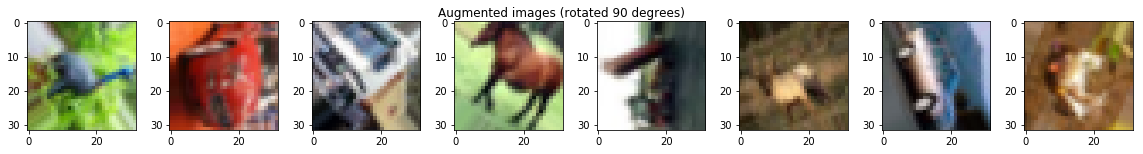

In [53]:
from scipy.misc import toimage

fig = plt.figure(figsize = (20,2))
for x_batch in dataget_train.flow(X_train_sample, batch_size = n):
     for i in range(0,n):
            ax = fig.add_subplot(1, n, i+1)
            ax.imshow(toimage(x_batch[i]))
     fig.suptitle('Augmented images (rotated 90 degrees)')
     plt.show()
     break;


### Training using augmented Dataset:

Please Run this section after Restarting the Kernal

In [38]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
                            rotation_range = 90,
                            width_shift_range = 0.1,
                            horizontal_flip = True,
                            vertical_flip = True
                             )

In [39]:
datagen.fit(X_train)

### To Increase the accuracy we need to increase the no of epochs:

In [40]:
cnn_model.fit_generator(datagen.flow(X_train, y_train, batch_size = 32), steps_per_epoch=5000,epochs=5)

Epoch 1/5
5000/5000 [==============================] - 1766s 353ms/step - loss: 1.6100 - acc: 0.4303
Epoch 2/5
5000/5000 [==============================] - 1909s 382ms/step - loss: 1.4884 - acc: 0.4768
Epoch 3/5
5000/5000 [==============================] - 1457s 291ms/step - loss: 1.4735 - acc: 0.4864
Epoch 4/5
5000/5000 [==============================] - 1496s 299ms/step - loss: 1.4847 - acc: 0.4864
Epoch 5/5
5000/5000 [==============================] - 1520s 304ms/step - loss: 1.4940 - acc: 0.4844


In [48]:
score = cnn_model.evaluate(X_test, y_test)
print('Test accuracy', score[1])

10000/10000 [==============================] - 26s 3ms/step
Test accuracy 0.2725


In [49]:
# save the model
directory = os.path.join(os.getcwd(), 'saved_models')

if not os.path.isdir(directory):
    os.makedirs(directory)
model_path = os.path.join(directory, 'keras_cifar10_trained_model_Augmentation.h5')
cnn_model.save(model_path)

# GREAT JOB! 